In [45]:
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer , KNNImputer


In [46]:
diabet = pd.read_csv("diabetes.csv")
data = pd.DataFrame(diabet)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
columns_with_zero_missing = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

zero_counts = (data[columns_with_zero_missing] == 0).sum()

zero_percentage = (zero_counts / len(data)) * 100

missing_summary = pd.DataFrame({
    "Zero_Count": zero_counts,
    "Missing_Percentage": zero_percentage
})

missing_summary

,Zero_Count,Missing_Percentage
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292


In [50]:
df = data.copy()

df[columns_with_zero_missing] = df[columns_with_zero_missing].replace(0, np.nan)
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [51]:
df[columns_with_zero_missing].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [53]:
df_strategy_A = data.copy()

imputer_mean = SimpleImputer(strategy="mean")

df_strategy_A[columns_with_zero_missing] = imputer_mean.fit_transform(
    df_strategy_A[columns_with_zero_missing]
)
df_strategy_A

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47,1


In [54]:
df_strategy_A[columns_with_zero_missing].isnull().sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [55]:
print(df["Glucose"].mean())
print(df_strategy_A["Glucose"].mean())

121.6867627785059
120.89453125


In [56]:
df_strategy_B = df.copy()



In [57]:
group_means = df_strategy_B.groupby("Outcome")[columns_with_zero_missing].mean()
group_means


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,
0,110.643863,70.877339,27.235457,130.287879,30.859674
1,142.319549,75.321429,33.000000,206.846154,35.406767


In [58]:
for c in columns_with_zero_missing:
    group_mean_col = df_strategy_B.groupby("Outcome")[c].transform("mean")
    df_strategy_B[c] = df_strategy_B[c].fillna(group_mean_col)

In [59]:
df_strategy_B[columns_with_zero_missing].isnull().sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [60]:
healthy_mean  = group_means.loc[0, "Glucose"]
diabetic_mean = group_means.loc[1, "Glucose"]
diff = diabetic_mean - healthy_mean

healthy_mean, diabetic_mean, diff


(110.64386317907444, 142.31954887218046, 31.67568569310602)

In [61]:
df_strategy_C = df.copy()

knn_imputer = KNNImputer(n_neighbors=5)

df_strategy_C[columns_with_zero_missing] = knn_imputer.fit_transform(df_strategy_C[columns_with_zero_missing])


check_nan= df["Glucose"].isna()

pd.DataFrame({
    "Outcome": data.loc[check_nan, "Outcome"],
    "Before (NaN)": df.loc[check_nan, "Glucose"],
    "After (KNN)": df_strategy_C.loc[check_nan, "Glucose"]
})



,Outcome,Before (NaN),After (KNN)
75,0,NaN,109.8
182,0,NaN,145.2
342,0,NaN,144.2
349,1,NaN,127.0
502,1,NaN,129.8


In [62]:
df_fe = df_strategy_B.copy()

df_fe["Category_Glucose"] = pd.cut(
    df_fe["Glucose"],
    bins=[0, 99, 125, np.inf],
    labels=["Normal", "Prediabetes", "Diabetic"]
)


C:\Users\Mlika\AppData\Local\Temp\ipykernel_10864\1016577106.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe.groupby("Category_Glucose")["Outcome"]


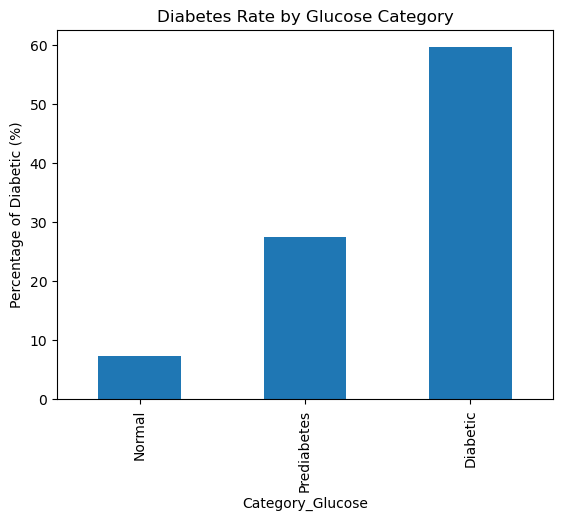

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

glucose_outcome = (
    df_fe.groupby("Category_Glucose")["Outcome"]
    .mean() * 100
)

glucose_outcome.plot(kind="bar")
plt.ylabel("Percentage of Diabetic (%)")
plt.title("Diabetes Rate by Glucose Category")
plt.show()


In [64]:

df_fe["Category_BMI"] = pd.cut(
    df_fe["BMI"],
    bins=[0, 18.5, 25, 30, np.inf],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)


In [65]:
bmi_outcome_rate = (
    df_fe.groupby("Category_BMI")["Outcome"]
    .mean() * 100
)

bmi_outcome_rate


C:\Users\Mlika\AppData\Local\Temp\ipykernel_10864\891929860.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe.groupby("Category_BMI")["Outcome"]


Category_BMI
Underweight     0.000000
Normal          6.481481
Overweight     24.444444
Obese          45.588235
Name: Outcome, dtype: float64

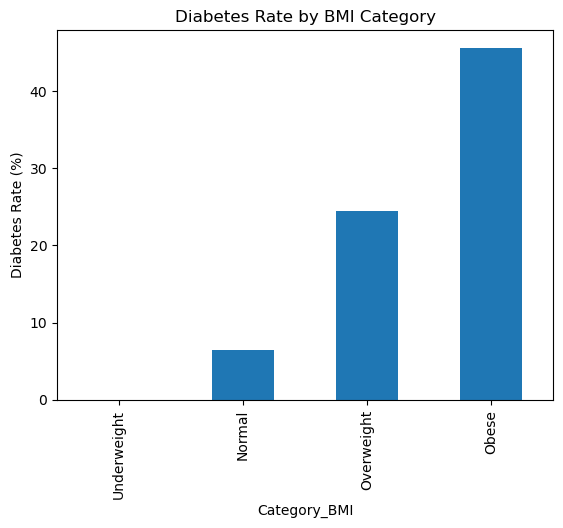

In [66]:
import matplotlib.pyplot as plt

bmi_outcome_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by BMI Category")
plt.show()


In [67]:


df_fe["Category_Age"] = pd.cut(
    df_fe["Age"],
    bins=[20, 30, 45, 60, np.inf],
    labels=["Young", "Aged_Middle", "Senior", "Elderly"]
)


age_outcome_rate = (
    df_fe.groupby("Category_Age")["Outcome"]
    .mean() * 100
)

age_outcome_rate




C:\Users\Mlika\AppData\Local\Temp\ipykernel_10864\2877567079.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe.groupby("Category_Age")["Outcome"]


Category_Age
Young          21.582734
Aged_Middle    51.502146
Senior         56.043956
Elderly        25.925926
Name: Outcome, dtype: float64

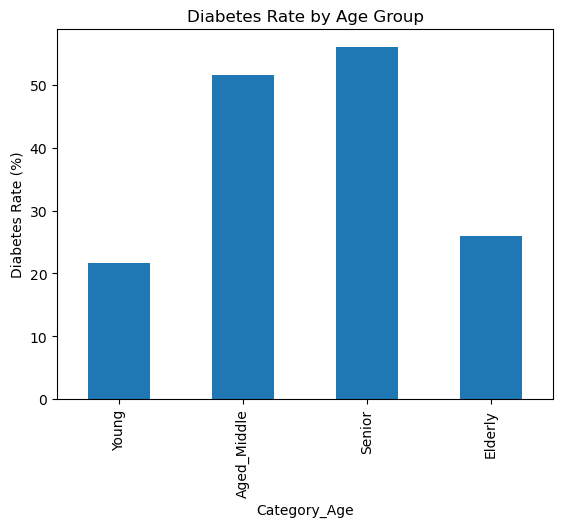

In [68]:
import matplotlib.pyplot as plt

age_outcome_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by Age Group")
plt.show()


In [69]:
df_fe["Insulin_to_Glucose_Ratio"] = df_fe["Insulin"] / df_fe["Glucose"]



correlation = df_fe["Insulin_to_Glucose_Ratio"].corr(df_fe["Outcome"])
correlation


0.25373412271748136

In [70]:
df_fe["Category_BloodPressure"] = pd.cut(
    df_fe["BloodPressure"],
    bins=[0, 79, 90, np.inf],
    labels=["Low", "Normal", "High"]
)


bp_outcome_rate = (
    df_fe.groupby("Category_BloodPressure")["Outcome"]
    .mean() * 100
)

bp_outcome_rate


C:\Users\Mlika\AppData\Local\Temp\ipykernel_10864\4262196537.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe.groupby("Category_BloodPressure")["Outcome"]


Category_BloodPressure
Low       31.616341
Normal    43.113772
High      47.368421
Name: Outcome, dtype: float64

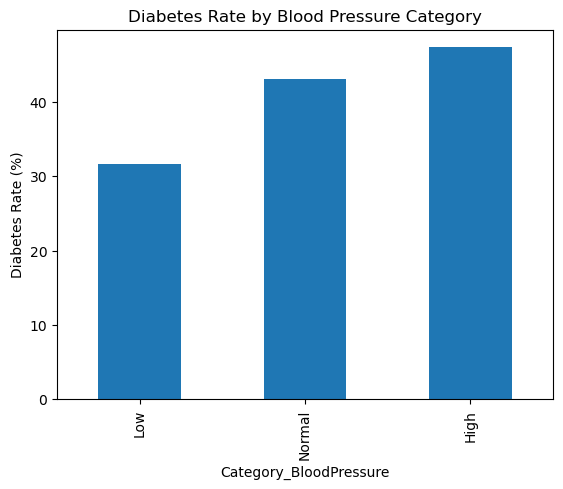

In [71]:
import matplotlib.pyplot as plt

bp_outcome_rate.plot(kind="bar")
plt.ylabel("Diabetes Rate (%)")
plt.title("Diabetes Rate by Blood Pressure Category")
plt.show()


In [72]:

X = df_fe.drop(columns=["Outcome"])
y = df_fe["Outcome"]

In [73]:
categorical_cols = ["Category_Glucose", "Category_BMI", "Category_Age", "Category_BloodPressure"]

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

#remove text column


In [74]:
from sklearn.model_selection import train_test_split

continuous_cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age",
    "Insulin_to_Glucose_Ratio"
]


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)



In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# continuous_cols_present = [
#     c for c in continuous_cols if c in X_train.columns
# ]

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[continuous_cols] = scaler.fit_transform(
    X_train[continuous_cols]
)


X_test_scaled[continuous_cols] = scaler.transform(
    X_test[continuous_cols]
)



In [76]:
print("Overall:", y.value_counts(normalize=True))
print("Train:", y_train.value_counts(normalize=True))
print("Test :", y_test.value_counts(normalize=True))


Overall: Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Train: Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64
Test : Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [77]:
X_train_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Category_Glucose_Normal,...,Category_BMI_Normal,Category_BMI_Overweight,Category_BMI_Obese,Category_Age_Young,Category_Age_Aged_Middle,Category_Age_Senior,Category_Age_Elderly,Category_BloodPressure_Low,Category_BloodPressure_Normal,Category_BloodPressure_High
209,0.931383,2.084393,0.962656,0.472112,0.640375,0.429288,-0.374779,0.632129,-0.250963,False,...,False,False,True,False,True,False,False,False,True,False
176,0.632606,-1.221926,0.470243,-0.214456,-0.284489,-0.209734,-0.294168,0.716992,0.518915,True,...,False,False,True,False,True,False,False,True,False,False
147,-0.562502,-0.520586,-0.678720,0.710317,-0.420853,-0.313761,2.745172,0.038086,-0.253831,False,...,False,False,True,False,True,False,False,True,False,False
454,-0.562502,-0.720969,-1.499409,-0.123398,-0.589980,0.771091,0.052162,-0.810548,-0.390689,False,...,False,False,True,True,False,False,False,True,False,False
636,0.333829,-0.587380,0.141968,-0.214456,-0.284489,-0.566398,-0.977870,1.226172,-0.008669,False,...,False,True,False,False,False,True,False,True,False,False


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


In [79]:
svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train_scaled, y_train)


y_pred_linear = svm_linear.predict(X_test_scaled)


linear_results = {
    "Accuracy": accuracy_score(y_test, y_pred_linear),
    "Precision": precision_score(y_test, y_pred_linear),
    "Recall": recall_score(y_test, y_pred_linear),
    "F1": f1_score(y_test, y_pred_linear),
    "ConfusionMatrix": confusion_matrix(y_test, y_pred_linear)
}

linear_results



{'Accuracy': 0.8268398268398268,
 'Precision': 0.735632183908046,
 'Recall': 0.7901234567901234,
 'F1': 0.7619047619047619,
 'ConfusionMatrix': array([[127,  23],
        [ 17,  64]], dtype=int64)}

In [80]:
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

rbf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rbf),
    "Precision": precision_score(y_test, y_pred_rbf),
    "Recall": recall_score(y_test, y_pred_rbf),
    "F1": f1_score(y_test, y_pred_rbf),
    "ConfusionMatrix": confusion_matrix(y_test, y_pred_rbf)
}

rbf_results


{'Accuracy': 0.8441558441558441,
 'Precision': 0.7647058823529411,
 'Recall': 0.8024691358024691,
 'F1': 0.7831325301204819,
 'ConfusionMatrix': array([[130,  20],
        [ 16,  65]], dtype=int64)}

In [81]:
svm_poly = SVC(kernel="poly", degree=3, random_state=42)
svm_poly.fit(X_train_scaled, y_train)

y_pred_poly = svm_poly.predict(X_test_scaled)


poly_results = {
    "Accuracy": accuracy_score(y_test, y_pred_poly),
    "Precision": precision_score(y_test, y_pred_poly),
    "Recall": recall_score(y_test, y_pred_poly),
    "F1": f1_score(y_test, y_pred_poly),
    "ConfusionMatrix": confusion_matrix(y_test, y_pred_poly)
}

poly_results


{'Accuracy': 0.8008658008658008,
 'Precision': 0.7464788732394366,
 'Recall': 0.654320987654321,
 'F1': 0.6973684210526315,
 'ConfusionMatrix': array([[132,  18],
        [ 28,  53]], dtype=int64)}

In [82]:
results_df = pd.DataFrame({
    "Linear": linear_results,
    "RBF": rbf_results,
    "Polynomial": poly_results
}).drop(index="ConfusionMatrix")

results_df


,Linear,RBF,Polynomial
Accuracy,0.82684,0.844156,0.800866
Precision,0.735632,0.764706,0.746479
Recall,0.790123,0.802469,0.654321
F1,0.761905,0.783133,0.697368


In [83]:
from sklearn.metrics import confusion_matrix

cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_poly = confusion_matrix(y_test, y_pred_poly)

cm_linear, cm_rbf, cm_poly


(array([[127,  23],
        [ 17,  64]], dtype=int64),
 array([[130,  20],
        [ 16,  65]], dtype=int64),
 array([[132,  18],
        [ 28,  53]], dtype=int64))

In [84]:
import pandas as pd

def cm_to_df(cm):
    return pd.DataFrame(
        cm,
        index=["Actual 0 (Healthy)", "Actual 1 (Diabetic)"],
        columns=["Pred 0 (Healthy)", "Pred 1 (Diabetic)"]
    )

cm_linear_df = cm_to_df(cm_linear)
cm_rbf_df    = cm_to_df(cm_rbf)
cm_poly_df   = cm_to_df(cm_poly)

cm_linear_df, cm_rbf_df, cm_poly_df


(                     Pred 0 (Healthy)  Pred 1 (Diabetic)
 Actual 0 (Healthy)                127                 23
 Actual 1 (Diabetic)                17                 64,
                      Pred 0 (Healthy)  Pred 1 (Diabetic)
 Actual 0 (Healthy)                130                 20
 Actual 1 (Diabetic)                16                 65,
                      Pred 0 (Healthy)  Pred 1 (Diabetic)
 Actual 0 (Healthy)                132                 18
 Actual 1 (Diabetic)                28                 53)

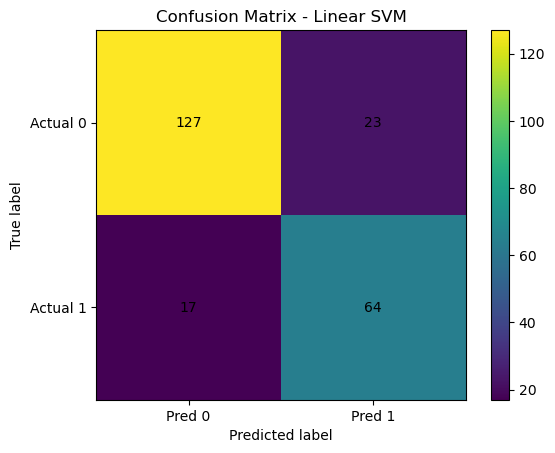

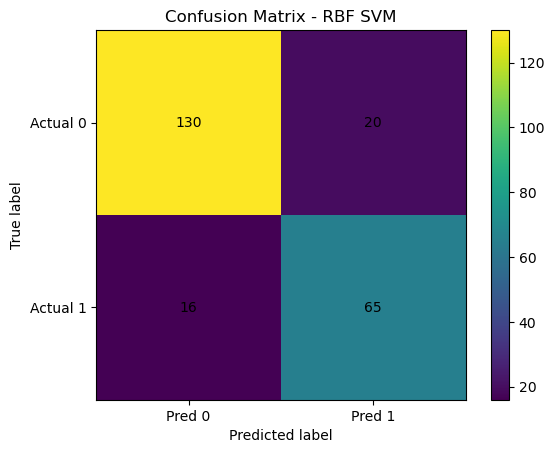

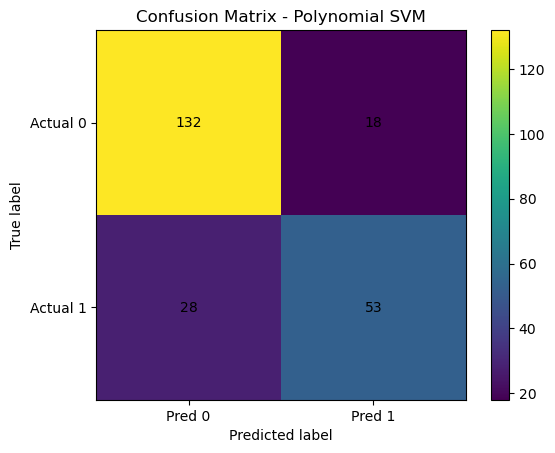

In [85]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cm(cm, title):
    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Pred 0", "Pred 1"])
    plt.yticks(tick_marks, ["Actual 0", "Actual 1"])

    # نوشتن عدد داخل خانه‌ها
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

  

plot_cm(cm_linear, "Confusion Matrix - Linear SVM")
plot_cm(cm_rbf, "Confusion Matrix - RBF SVM")
plot_cm(cm_poly, "Confusion Matrix - Polynomial SVM")


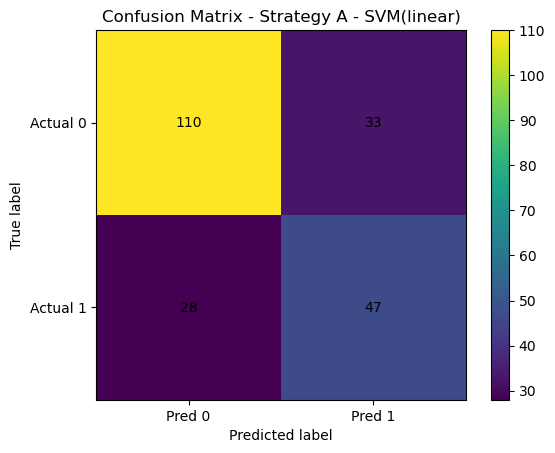

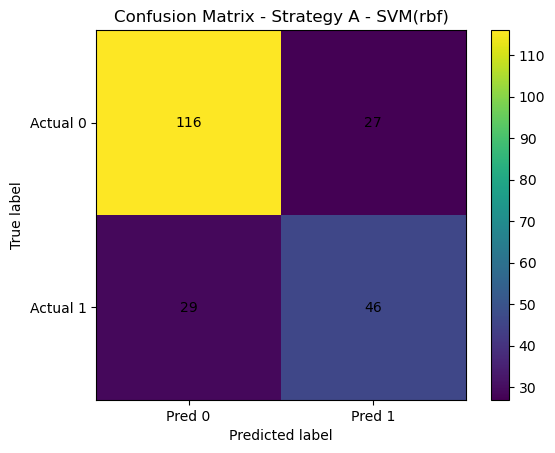

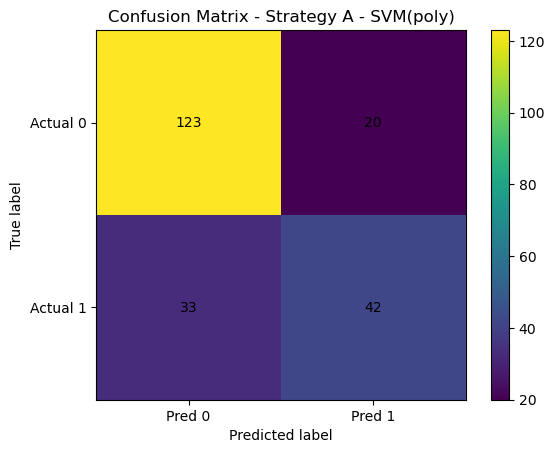

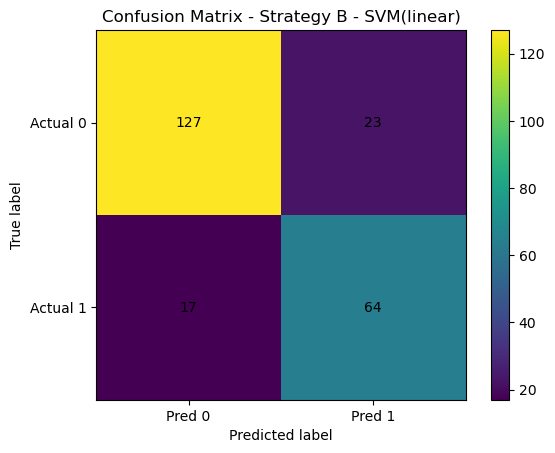

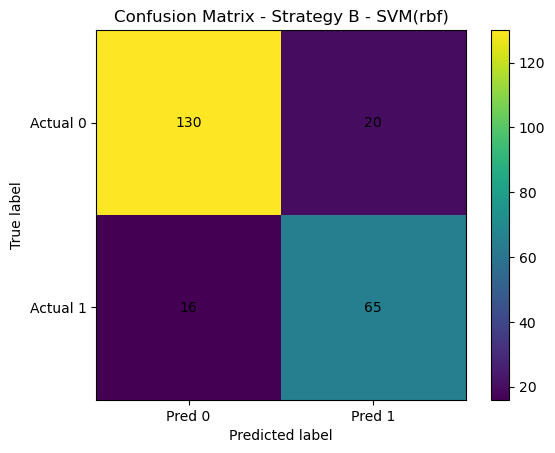

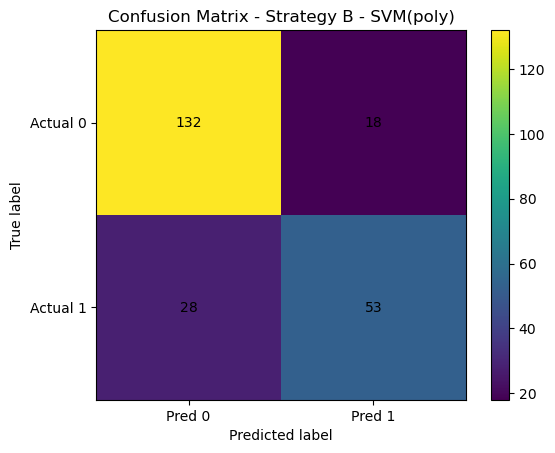

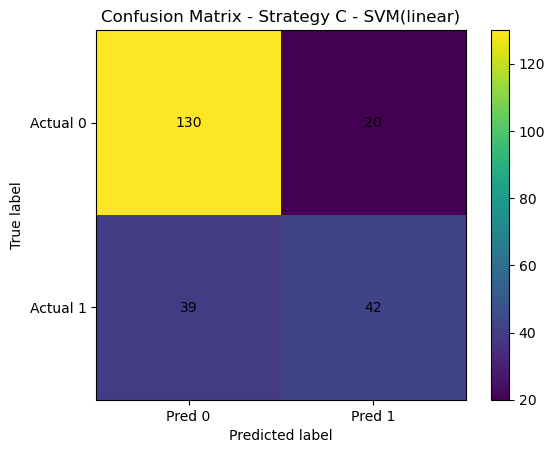

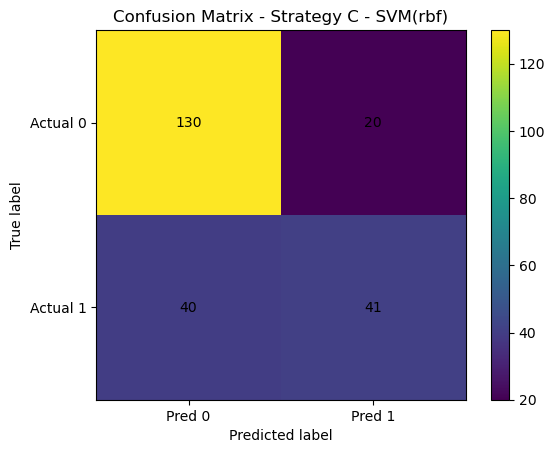

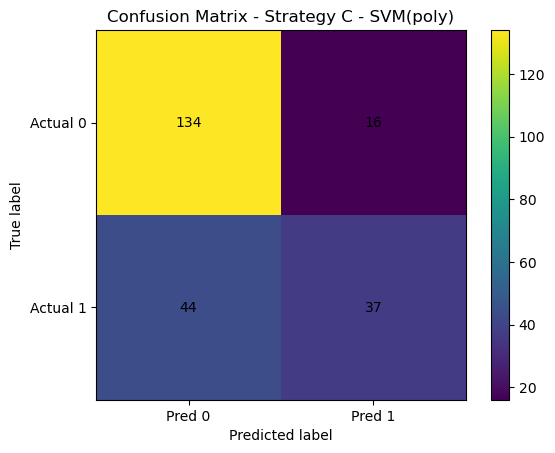

,Strategy,Kernel,Accuracy,Precision,Recall,F1
0,A,linear,0.720183,0.587500,0.626667,0.606452
2,A,poly,0.756881,0.677419,0.560000,0.613139
1,A,rbf,0.743119,0.630137,0.613333,0.621622
3,B,linear,0.826840,0.735632,0.790123,0.761905
5,B,poly,0.800866,0.746479,0.654321,0.697368
4,B,rbf,0.844156,0.764706,0.802469,0.783133
6,C,linear,0.744589,0.677419,0.518519,0.587413
8,C,poly,0.740260,0.698113,0.456790,0.552239
7,C,rbf,0.740260,0.672131,0.506173,0.577465


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def feature_engineer(df: pd.DataFrame) -> pd.DataFrame:
    df_fe = df.copy()

    
    df_fe["Insulin_to_Glucose_Ratio"] = df_fe["Insulin"] / df_fe["Glucose"]

    df_fe["Category_Glucose"] = pd.cut(
        df_fe["Glucose"],
        bins=[0, 99, 125, np.inf],
        labels=["Normal", "Prediabetes", "Diabetic"]
    )

    df_fe["Category_BMI"] = pd.cut(
        df_fe["BMI"],
        bins=[0, 18.5, 25, 30, np.inf],
        labels=["Underweight", "Normal", "Overweight", "Obese"]
    )

    df_fe["Category_Age"] = pd.cut(
        df_fe["Age"],
        bins=[20, 30, 45, 60, np.inf],
        labels=["Young", "Aged_Middle", "Senior", "Elderly"]
    )

    df_fe["Category_BloodPressure"] = pd.cut(
        df_fe["BloodPressure"],
        bins=[0, 79, 90, np.inf],
        labels=["Low", "Normal", "High"]
    )

    
    df_fe = df_fe.replace([np.inf, -np.inf], np.nan)
    df_fe = df_fe.dropna()

    return df_fe


def plot_cm(cm, title):
    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Pred 0", "Pred 1"])
    plt.yticks(tick_marks, ["Actual 0", "Actual 1"])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


strategies = {
    "A": df_strategy_A,
    "B": df_strategy_B,
    "C": df_strategy_C,
}

kernels = ["linear", "rbf", "poly"]  

categorical_cols = ["Category_Glucose", "Category_BMI", "Category_Age", "Category_BloodPressure"]

continuous_cols = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age",
    "Insulin_to_Glucose_Ratio"
]

all_results = {}  


for s_name, df_imp in strategies.items():
    df_fe = feature_engineer(df_imp)

    X = df_fe.drop(columns=["Outcome"])
    y = df_fe["Outcome"]

    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y,
        test_size=0.3,
        random_state=42,
        stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled  = X_test.copy()

    present_cont_cols = [c for c in continuous_cols if c in X_train_scaled.columns]

    X_train_scaled[present_cont_cols] = scaler.fit_transform(X_train_scaled[present_cont_cols])
    X_test_scaled[present_cont_cols]  = scaler.transform(X_test_scaled[present_cont_cols])

    all_results[s_name] = {}

    for k in kernels:
        model = SVC(kernel=k, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        cm = confusion_matrix(y_test, y_pred)

        all_results[s_name][k] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "ConfusionMatrix": cm
        }

        
        plot_cm(cm, f"Confusion Matrix - Strategy {s_name} - SVM({k})")



summary_rows = []
for s_name in all_results:
    for k in all_results[s_name]:
        r = all_results[s_name][k]
        summary_rows.append({
            "Strategy": s_name,
            "Kernel": k,
            "Accuracy": r["Accuracy"],
            "Precision": r["Precision"],
            "Recall": r["Recall"],
            "F1": r["F1"]
        })

summary_df = pd.DataFrame(summary_rows).sort_values(["Strategy", "Kernel"])
summary_df
